# **PROG8245 - Machine Learning Programming**
# **Project: Applying NLP to Major Tasks**
___

## **Group 7**
## **Group Members:**

| **Name** | **ID** |
|---|---|
| Syed Muzammil | 9012161 |
| Ashley Sherry | 9015649 |
| Ranjan Karunanithi | 9023408 |

___


### **Data Collection:**

#### **1. Collecting a dataset of product reviews**
#### Source: [Kaggle - Amazon Product Reviews](https://www.kaggle.com/datasets/arhamrumi/amazon-product-reviews)

#### The dataset contains Amazon product reviews with 10 columns: 
- #### identifiers — Id, ProductId, UserId
- #### user profile information — ProfileName
- #### helpfulness metrics — HelpfulnessNumerator, HelpfulnessDenominator
- #### review — Score (1-5)
- #### Time — timestamp
- #### Textual content — Summary and Text. 

#### It allows one to take an overview of customer sentiments, feedback quality, and experiences of the products. The Score column is the rating by users; Helpfulness metrics show how other users perceived the value of reviews. Summary is a short title of a review; Text is where detailed opinion lies. The dataset is highly suitable for tasks falling within sentiment analysis, customer satisfaction analysis, natural language processing, and extracting insights from customer feedback.

In [1]:
import pandas as pd

# Load the uploaded file to inspect its structure and contents
file_path = 'AmazonProductReviews.csv'
reviews_df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
reviews_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### **2. Annotate the dataset with labels of positive, negative or neutral sentiment, based on collected data**

#### Source of the model: [Hugging face - LiYuan/amazon-review-sentiment-analysis](https://huggingface.co/LiYuan/amazon-review-sentiment-analysis?utm_source=chatgpt.com)

1. #### A Pretrained Transformer Model
    - ##### An example of a pretrained model is LiYuan/amazon-review-sentiment-analysis which is a fine-tuned model based out of the general architecture of a pretrained transformer fine-tuned for the task of sentiment analysis specifically in Amazon reviews.
    - ##### Utilizing transfer learning, thus enabling good generalization on unseen data by drawing inference from large-scale pretraining and fine-tuning for specific domains.

2. #### Tokenization

    - ##### Tokenization divides text into smaller units (tokens) and maps those tokens to the numerical representations (input IDs) meant for the transformer model. For example, "great product!" → ["great", "product", "!"].

    - ##### Provides a format to make sense of the text inputs for the model. Truncates/pads all inputs to a set size, which is max_length=512.

3. #### Sentiment Prediction
    - #### The model generates logits (raw scores) for each sentiment class (e.g., positive, negative, neutral) and converts the logits into probabilities using a softmax function.
        - ##### predicted_class: The most likely sentiment class.
        - ##### confidence: The confidence regarding the prediction made by the model.

    - ##### It identifies the sentiment class for review but also provides with a confidence score, which enables one to make better-informed decisions.

4. #### Annotating the Dataset

    - ##### This function gets applied on first 30,000 reviews and assigns each of them a predicted sentiment and the confidence score, which are later added under new columns in the dataframe (Sentiment, Confidence). 

    - ##### The annotating of dataset with feelings predicted by the model would lead to: 
        - #####  The study of distribution of feelings in the reviews. 
        - #####  The new annotations would be put into use in applications such as analysis of feedback given by customers.

In [19]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the pre-trained model and tokenizer
model_name = "LiYuan/amazon-review-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Define a function to predict sentiment
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=1)
    confidence, predicted_class = torch.max(probabilities, dim=1)
    return predicted_class.item(), confidence.item()

# Annotating only the first 10 rows for demonstration
subset_reviews = reviews_df.head(30000).copy()  # Create a copy of the first 10 rows to avoid altering the original dataframe

# Apply sentiment prediction to the subset
subset_reviews["Sentiment"], subset_reviews["Confidence"] = zip(
    *subset_reviews["Text"].apply(predict_sentiment)
)

subset_reviews.to_csv('annotated_reviews.csv', index=False)


# Display the annotated dataset
subset_reviews.head(20)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Confidence
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,4,0.907009
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,0.627568
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,4,0.923840
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,4,0.811363
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,4,0.909734
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,4,0.500570
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,4,0.913439
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,4,0.946467
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,4,0.843667
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,4,0.826669


#### Overview of Workflow
- ##### Load Pretrained Model: A pre-trained model fine-tuned on Amazon reviews for sentiment analysis is loaded.
- ##### Input Tokenization: Reviews are tokenized and prepped for the model.
- ##### Predict Sentiment: Sentiments get predicted with confidence scores.
- ##### Annotate Dataset: Predictions are added to the dataset for analysis and saved for future use.

____

### **Preprocessing**

1. #### Text Preprocessing
    ##### During the early stage of text processing, text preprocessing is a crucial activity to be done so as the raw data can be utilized in machine learning models. This code is responsible for several preprocessing related tasks like cleaning the text and standardizing it for better feature extraction.
2. #### Key Steps in the Preprocessing Pipeline
- ##### Emoji Conversion:
    - ##### Concept: Emojis are the writers of the expressive text, which can be converted from emojis into descriptive text using the emoji.demojize() function for example, is:P. 
    - ##### Why It's Important: Emojis are the means of expression and emotions that are required to be analyzed.

- ##### Slang Expansion:
    - ##### Concept: Slang words (e.g., "u", "gr8") are replaced with their extended forms in English using a dictionary (e.g., "u" → "you").
    - ##### Why It's Important: Slang is frequently used in colloquial texts such as social media, and extending it makes the sense clearer and the expression more informative.

- ##### Lowercasing:
    - ##### Concept: The change of all words into lowercase is to provide the language with a case insensitive manner (e.g., "Great" and "great" are addressed equally).
    - ##### Why It's Important: By removing doubles, it provides a more unified experience.

- ##### Punctuation Removal:
    - ##### Concept: This operation deletes almost no text except for meaningful special characters like hashtags (#) that can establish attributes.
    - ##### Why It's Important: Eschews verbose text while retaining symbolic mainstays.

- ##### Hashtag Splitting:
    - ##### Concept: Separates hash tags in a way that they show the constituent words which are the same ones, for example, Best Day without the # mark.
    - ##### Why It's Important: Describes by using necessary information from hashtags.

- ##### Tokenization:
    - ##### Concept: Text is divided into separate units, words, or tokens, so as the sentence becomes: I love NLP, with respect to their place in the array, i.e., ["I", "love", "NLP"].
    - ##### Why It's Important: Transforms text into discrete units for additional tasks, e.g. stopword removal.
- ##### Stopword Removal:
    - ##### Concept: Is the extraction of the common words that do not add meaning (e.g., "the," "and," "is.") 
    - ##### Why It's Important: It zeroes in on meaningful words and reduces feature dimensionality.
- ##### Stemming:
    - ##### Concept: The action of reducing words to their base form by deleting suffixes (e.g., "running" → "run")
    - ##### Why It's Important: Words that are similar but not the same are put together, thus improving generalization.
- ##### Lemmatization:
    - ##### Concept: Is the process of reducing words to their base dictionary forms (e.g., "better" → "good")
    - ##### Why It's Important: The meaning remains the same because the right base word is chosen.

#### **1. Perform necessary text preprocessing steps such as tokenization, stop-word removal, stemming/lemmatization, and lowercasing.**

In [9]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import nltk

# Ensure the necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load your dataset (ensure the file path is correct)
file_path = 'annotated_reviews.csv'
annotated_reviews_df = pd.read_csv(file_path)

# Initialize tools for preprocessing
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define a preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()

        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))

        # Tokenize
        tokens = word_tokenize(text)

        # Remove stopwords
        filtered_tokens = [word for word in tokens if word not in stop_words]

        # Apply stemming
        stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

        # Apply lemmatization
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

        # Rejoin tokens into a single string
        processed_text = ' '.join(lemmatized_tokens)
        return processed_text
    return text

# Apply preprocessing to the 'Text' column
annotated_reviews_df['Processed_Text'] = annotated_reviews_df['Text'].apply(preprocess_text)

# Save the processed dataset to a CSV file
output_file_path = 'processed_annotated_reviews.csv'
annotated_reviews_df.to_csv(output_file_path, index=False)

annotated_reviews_df.head(20)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\syedm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\syedm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\syedm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Confidence,Processed_Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,4,0.907009,bought sever vital can dog food product found ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,0.627568,product arriv label jumbo salt peanutsth peanu...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,4,0.923840,confect around centuri light pillowi citru gel...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,4,0.811363,look secret ingredi robitussin believ found go...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,4,0.909734,great taffi great price wide assort yummi taff...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,4,0.500570,got wild hair taffi order five pound bag taffi...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,4,0.913439,saltwat taffi great flavor soft chewi candi in...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,4,0.946467,taffi good soft chewi flavor amaz would defini...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,4,0.843667,right im mostli sprout cat eat grass love rota...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,4,0.826669,healthi dog food good digest also good small p...


#### **2. Handle specific challenges of used text like hashtags, emojis, and slang**

In [14]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import emoji

# Ensure NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
file_path = 'processed_annotated_reviews.csv'
reviews_df = pd.read_csv(file_path)

# Initialize tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define a slang dictionary
slang_dict = {
    "u": "you",
    "gr8": "great",
    "luv": "love",
    "idk": "I don't know",
    "btw": "by the way",
    "lol": "laughing out loud",
    # Add more slang as needed
}

# Function to expand slang
def expand_slang(text):
    words = text.split()
    expanded_words = [slang_dict.get(word, word) for word in words]
    return ' '.join(expanded_words)

# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):
        # Convert emojis to text
        text = emoji.demojize(text)

        # Expand slang
        text = expand_slang(text)

        # Convert to lowercase
        text = text.lower()

        # Remove punctuation (excluding hashtags)
        text = text.translate(str.maketrans('', '', string.punctuation.replace('#', '')))

        # Split hashtags
        text = re.sub(r'#(\w+)', lambda m: ' '.join(re.findall(r'[A-Z]?[a-z]+', m.group(1))), text)

        # Tokenize
        tokens = word_tokenize(text)

        # Remove stopwords
        filtered_tokens = [word for word in tokens if word not in stop_words]

        # Apply stemming
        stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

        # Apply lemmatization
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

        # Rejoin tokens into a single string
        processed_text = ' '.join(lemmatized_tokens)
        return processed_text
    return text

# Apply preprocessing
reviews_df['Processed_Text'] = reviews_df['Text'].apply(preprocess_text)

# Save the processed dataset
output_file_path = 'processed_annotated_reviews_with_handling.csv'
reviews_df.to_csv(output_file_path, index=False)

reviews_df.head(20)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\syedm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\syedm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\syedm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Confidence,Processed_Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,4,0.907009,bought sever vital can dog food product found ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,0.627568,product arriv label jumbo salt peanutsth peanu...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,4,0.923840,confect around centuri light pillowi citru gel...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,4,0.811363,look secret ingredi robitussin believ found go...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,4,0.909734,great taffi great price wide assort yummi taff...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,4,0.500570,got wild hair taffi order five pound bag taffi...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,4,0.913439,saltwat taffi great flavor soft chewi candi in...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,4,0.946467,taffi good soft chewi flavor amaz would defini...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,4,0.843667,right im mostli sprout cat eat grass love rota...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,4,0.826669,healthi dog food good digest also good small p...


#### Why This Preprocessing Is Necessary
- ##### Consistency: Ensures that text data are uniformly presented.
- ##### Noise Reduction: Removes unused parts of the content (e.g. stopwords, punctuation) and focuses on the material that really counts.
- ##### Feature Enrichment: Gets the most useful features by removing irrelevant parts (e.g. resolving hashtags, and elaborating slang) so that model performance can be further improved.
- ##### Standardization: Convert text data into one of the vectorization methods like Bag-of-Words, TF-IDF, or Word2Vec through machine learning which prepares the material for machine learning procedures.



----

### **Feature Extraction and Model Comparison**

#### **1. Explore different feature representation methods such as bag-of-words, TF-IDF, word embeddings (e.g., Word2Vec or GloVe), or contextual embeddings (e.g., BERT or GPT)**
   - #### Experiment with 3 different feature extraction techniques to capture meaningful representations of social media text where the 3 techniques should be of different word embedding categories.

##### We employ Bag-of-Words, TF-IDF, and Word2Vec—three embedding strategies—to present the numeric representation of given text data. Each of the techniques the different strengths, and we made the decision to include them in the analysis in order to assess their performance in the task of sentiment classification. Explanation of why each embedding was chosen is as follows:

1. #### **Bag-of-Words (BoW)**
    - ##### Concept:
        - ##### The text is transformed into a sparse matrix where documents are the rows and words are the columns (top 500 features in this case).
        - ##### Each cell contains the count of the word in the document.

    - ##### Why It Was Used:
        - ##### Baseline Technique: Simple and widely used for comparison.
        - ##### Frequency Focus: Captures word frequency, often sufficient for sentiment classification.

    - ##### Strengths:
        - ##### It has excellent interpretability; hence a beginner can easily utilize it to train models.
        - ##### It can perform very well when word frequency and sentiment are positively correlated.

    - ##### Limitations:
        - ##### There is no Context:  It ignores word meaning and order.
        - ##### High Dimensionality: It is demanding for big vocabularies.

    - ##### Relevance to the Project:
        - ##### Has a simplistic representation for machine learning.
        - ##### Acts as a primary metric that is used to assess the more sophisticated methods like TF-IDF and Word2Vec.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np

file_path = 'processed_annotated_reviews_with_handling.csv'
processed_reviews_df = pd.read_csv(file_path)

# Extract the Processed_Text column for experimentation
texts = processed_reviews_df['Processed_Text']

# Bag-of-Words representation
bow_vectorizer = CountVectorizer(max_features=500)  # Limit to top 500 features
bow_features = bow_vectorizer.fit_transform(texts)

# TF-IDF representation
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Limit to top 500 features
tfidf_features = tfidf_vectorizer.fit_transform(texts)

# Word2Vec representation
# Tokenize text for Word2Vec
tokenized_texts = [text.split() for text in texts]
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)
# Compute the average Word2Vec vector for each text
word2vec_features = np.array([
    np.mean([word2vec_model.wv[word] for word in words if word in word2vec_model.wv] or [np.zeros(100)], axis=0)
    for words in tokenized_texts
])

# Display feature dimensions for each representation method
bow_features.shape, tfidf_features.shape, word2vec_features.shape


((30000, 500), (30000, 500), (30000, 100))

2. #### **TF-IDF (Term Frequency-Inverse Document Frequency)**
    - ##### Concept:
        - ##### TF-IDF sets weights to words based on the importance to them:TF: Calculates word frequency in a document.IDF: Drops support for common words through documents (e.g., "the", "and").
        - ##### TF of $w$ expresses the frequency of word $w$ in document.
        - ##### IDF scales down the weights of common terms across documents, such as "the" and "and".

    - ##### Why it was used:
        - ##### It Sheds Light on Informative Words: The focus is on words that can help to be more specific in a classification task.
        - ##### Better Generalization: It achieves this by not overfitting due to the use of raw word counts.

    - ##### Strengths:
        - ##### Indicates how much the word was involved in the corpus.
        - ##### It is beneficial whenever only some words express the polarity of a sentence.

    - ##### Limitations:
        - ##### Loses the information of context and word order.
        - ##### CPU power is also being wasted, maybe not as much as used in BoW.

    - ##### Project Relevance:
        - ##### TF-IDF is significant in the study of word importance for the proper identification of sentiment classes that are positive, negative, or neutral.
        - ##### The reason that it is both simple and

3. #### **Word2Vec**

    - ##### Concept:

        - ##### Word2Vec is a method that generates a small and fixed-size representation of words in a continuous vector space. It does this by learning from its behavior where word pairs like "happy" and "joyful" are supposed to be.
        - ##### The bag of words model is a representation of the document by the average of the word vectors of all the words in the document.

    - ##### Why It Was Used:

        - ##### Semantic Understanding: Captures relationships between words.
        - ##### Compact Representation: Dense vectors are lower dimensional than BoW/TF-IDF.
        - ##### Pretrained Potential: Transferable to new tasks with pre-trained embeddings.

    - ##### Strengths:

        - ##### It uses word embeddings to encode both meaning and similarity of words.
        - ##### The compact representation of the vectors is very efficient compared to other methods like count vectorizer or TF-IDF.

    - ##### Limitations:

        - ##### Static Embeddings: Words always have the same vector irrespective of their contexts.
        - ##### Loss of Structure: Averaging embeddings can lead to the loss of some information more often than not.

    - ##### Relevance to the Project:
        - ##### An investigation into the influence of semantic relationships through classification.
        - ##### Brings up potential as a successor to skilled architectures like neural networks.

----

#### **2. Model Building**
- #### Choose a suitable machine learning algorithm (e.g., Naive Bayes, SVM, or neural networks) or deep learning model
- #### Split the dataset into training and testing sets.
- #### Train the selected model using the training data, evaluate and record its performance on the training and testing data

#### **Splitting the dataset into train and test**

1. #### Purpose of Dataset Splitting
    ##### The dataset splitting is an indispensable stage in machine learning processes. This is done in order to make the models learn and evaluate them on the separated training and testing data mostly. The model can generalize to new data only after the split when we can check it [the model] in practice.
2. #### Key Components
    - ##### Features (X): Processed_Text column contains the input data (processed reviews) from which the model learns patterns.
    - ##### Labels (y): The Sentiment column shows the output labels (e.g., sentiment classes) which the model predicts.

In [3]:
from sklearn.model_selection import train_test_split

# Assuming the dataset has a 'Processed_Text' column and a 'Sentiment' column
X = processed_reviews_df['Processed_Text']
y = processed_reviews_df['Sentiment']  # Replace 'Sentiment' with the actual label column

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the resulting datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((24000,), (6000,), (24000,), (6000,))

3. #### The Split
    - ##### Training Set:Comprises 80% of the data in this example (test_size=0.2).It is here that the model is trained by tuning its parameters.
    - ##### Contains 80% of the data in this example (test_size=0.2).
    - ##### Is used to train the model by optimizing its parameters.
    - ##### Testing Set:20% of the data.Evaluates the model's performance on unseen data to measure its generalization.
    - ##### Comprises 20% of the data.
    - ##### Evaluates the model's performance on unseen data to measure its generalization.

4. #### Importance of random_state
    - ##### By setting random_state=42, you can make the same division so you will always receive the same results and reproducibility is guaranteed.

5. #### Why This Step is Necessary
    - ##### The leakage of data: It is a method to avoid that the training set leaks to the testing set and thus, the model's bias provided by their performance is not accurate.
    - ##### Overfitting avoidance: Does that the model is examined on the same data it was trained on for training purposes, which might lead to the distortion of the KPIs.

#### **Feature Representation**

1. #### Bag-of-Words (BoW)
    - ##### Concept:
        - ##### Words in the text are treated as a sparse matrix of word counts.
        - ##### Each column of the matrix is associated with a specific word in the corpus. The rows of the matrix represent the documents.'''
        - ##### Not capturing word order or meaning.
    - ##### Implementation:
        - ##### CountVectorizer is used to extract the top 5000 most frequent words as features.
        - ##### Resulting matrix dimensions: (number of documents × 5000).



In [4]:
# Bag-of-Words feature extraction
vectorizer_bow = CountVectorizer(max_features=5000)
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

2. #### TF-IDF (Term Frequency-Inverse Document Frequency)
    - ##### Concept:
        - ##### Extends the BoW approach by assigning different weights to the words according to their frequency and significance.TF: The word's frequency in the document.IDF: Putting down the weight of correlate words in all documents, thus the singular will be used.p3
        - ##### The word's frequency in the document.
        - ##### IDF: Reduces the weight of common words across documents.
        - ##### It brings out the discriminative term while leaving the non-specific term behind.
    - ##### Implementation:
        - ##### TfidfVectorizer is used to extract the top 5000 weighted word features.
        - ##### Resulting matrix dimensions: (number of documents × 5000).

In [5]:
# Convert text data into TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


3. #### Word2Vec
    - ##### Concept:
        - ##### Each word signifies a dense vector (300-dimensional in the default case) in a continuous space. The first is the relative relationship between the words that make the sentence
        - ##### Illustrates connections between words.
        - ##### A document is depicted by the mean embedding of all words in the document.
    - ##### Implementation 
        - ##### Boiled down Word2Vec wits5 model emits the embeddings of all the words in the text.
        - ##### In case there is no word on the list, a zero vector is given for this word.
        - ##### Resulting Dimensions: (number of documents × 300).

In [6]:
def get_word2vec_features(texts):
    features = []
    for text in texts:
        words = text.split()
        embeddings = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
        if embeddings:
            features.append(np.mean(embeddings, axis=0))
        else:
            features.append(np.zeros(300))  # Zero vector for empty or unknown words
    return np.array(features)

X_train_word2vec = get_word2vec_features(X_train)
X_test_word2vec = get_word2vec_features(X_test)



#### **Model Training and Evaluation**

#### **Support Vector Machines (SVM)**
- ##### Feature: 
    - ##### SVM is a strong classifier with the optimal hyperplane selected to distinguish between classes in the feature space.A linear kernel technique is employed, namely, the classifier theorizes that data is linearly separable in the given feature space.
    - ##### SVM is a powerful classifier that finds the optimal hyperplane to separate classes in the feature space.
    - ##### A linear kernel is used here, meaning the classifier assumes data is linearly separable in the given feature space.
- ##### Why SVM?:
    - ##### Works well with high-dimensional data (e.g., BoW and TF-IDF).Efficiently handles class imbalances and sparse data in the right way.
    - ##### Works well with high-dimensional data (e.g., BoW and TF-IDF).
    - ##### Handles class imbalances and sparse data efficiently.

- #### Bag-of-Words

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Bag-of-Words feature extraction
model_svm = SVC(kernel='linear')
model_svm.fit(X_train_bow, y_train)

# Predict on training and testing sets
y_train_pred_bow = model_svm.predict(X_train_bow)
y_test_pred_bow = model_svm.predict(X_test_bow)

# Evaluate the model on the training set
print("Training Performance:")
print(classification_report(y_train, y_train_pred_bow))

# Evaluate the model on the testing set
print("Testing Performance:")
print(classification_report(y_test, y_test_pred_bow))

Training Performance:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2234
           1       0.97      0.93      0.95      1148
           2       0.95      0.88      0.91      1700
           3       0.95      0.77      0.85      2488
           4       0.95      0.99      0.97     16430

    accuracy                           0.96     24000
   macro avg       0.96      0.91      0.93     24000
weighted avg       0.96      0.96      0.95     24000

Testing Performance:
              precision    recall  f1-score   support

           0       0.60      0.65      0.63       576
           1       0.27      0.31      0.29       287
           2       0.36      0.36      0.36       448
           3       0.36      0.29      0.32       628
           4       0.86      0.87      0.87      4061

    accuracy                           0.73      6000
   macro avg       0.49      0.50      0.49      6000
weighted avg       0.72      0.73 

- #### TF-IDF

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

model_svm = SVC(kernel='linear')
model_svm.fit(X_train_tfidf, y_train)

# Predict on training and testing sets
y_train_pred_tfidf = model_svm.predict(X_train_tfidf)
y_test_pred_tfidf = model_svm.predict(X_test_tfidf)

# Evaluate the model
print("Training Performance:")
print(classification_report(y_train, y_train_pred_tfidf))

print("Testing Performance:")
print(classification_report(y_test, y_test_pred_tfidf))


Training Performance:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      2234
           1       0.81      0.36      0.50      1148
           2       0.76      0.39      0.51      1700
           3       0.73      0.37      0.49      2488
           4       0.84      0.99      0.91     16430

    accuracy                           0.83     24000
   macro avg       0.79      0.57      0.64     24000
weighted avg       0.82      0.83      0.81     24000

Testing Performance:
              precision    recall  f1-score   support

           0       0.69      0.61      0.65       576
           1       0.46      0.16      0.23       287
           2       0.56      0.27      0.36       448
           3       0.49      0.23      0.31       628
           4       0.80      0.97      0.88      4061

    accuracy                           0.76      6000
   macro avg       0.60      0.45      0.49      6000
weighted avg       0.72      0.76 

- #### Word2Vec

In [9]:
model_svm_word2vec = SVC(kernel='linear', random_state=42)

# Train the model on Word2Vec features
model_svm_word2vec.fit(X_train_word2vec, y_train)

# Predict on training and testing sets
y_train_pred_word2vec = model_svm_word2vec.predict(X_train_word2vec)
y_test_pred_word2vec = model_svm_word2vec.predict(X_test_word2vec)

# Evaluate the model
print("Training Performance (Word2Vec):")
print(classification_report(y_train, y_train_pred_word2vec))

print("Testing Performance (Word2Vec):")
print(classification_report(y_test, y_test_pred_word2vec))

Training Performance (Word2Vec):
              precision    recall  f1-score   support

           0       0.58      0.50      0.53      2234
           1       0.36      0.01      0.03      1148
           2       0.38      0.02      0.04      1700
           3       0.32      0.01      0.01      2488
           4       0.74      0.98      0.84     16430

    accuracy                           0.72     24000
   macro avg       0.47      0.30      0.29     24000
weighted avg       0.63      0.72      0.63     24000

Testing Performance (Word2Vec):
              precision    recall  f1-score   support

           0       0.56      0.49      0.52       576
           1       0.42      0.02      0.03       287
           2       0.40      0.02      0.03       448
           3       0.50      0.01      0.02       628
           4       0.73      0.98      0.84      4061

    accuracy                           0.71      6000
   macro avg       0.52      0.30      0.29      6000
weighted avg

#### **Key Observations**
- ##### Bag of words (BoW): High-dimensional distinction method. It's great on the train dataset but may overfit.
- ##### Term frequency inverse document frequency (TF-IDF): Raises the primary and most significant information at the same time as the baseline.+ This can be observed when TF-IDF is used on the testing data.
- ##### Word2Vec: Carries forward semantics, which often interact negatively with traditional models like SVM for if the proper training is not done.

____

#### 3. **Interpretation of results**
- #### Visualize your results
- #### Compare different feature representation
- #### Reach a conclusion on which is the best Embedding technique to use for your model

#### **1.Visualize the result**

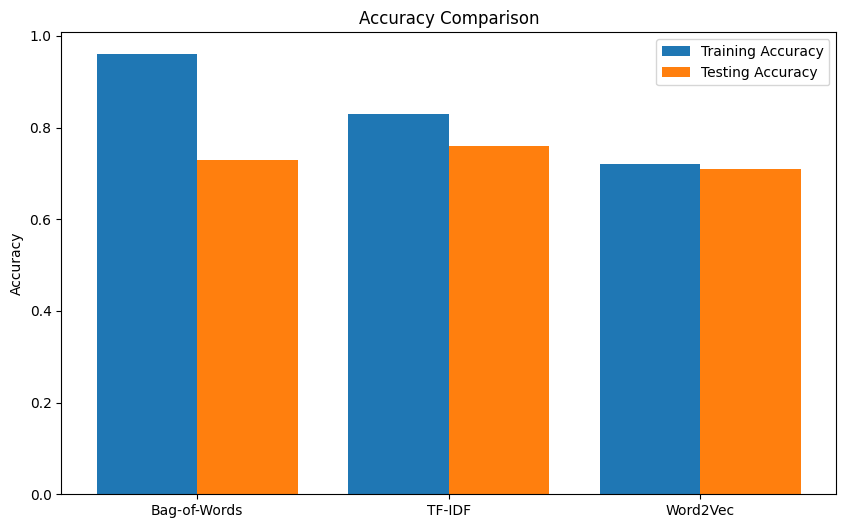

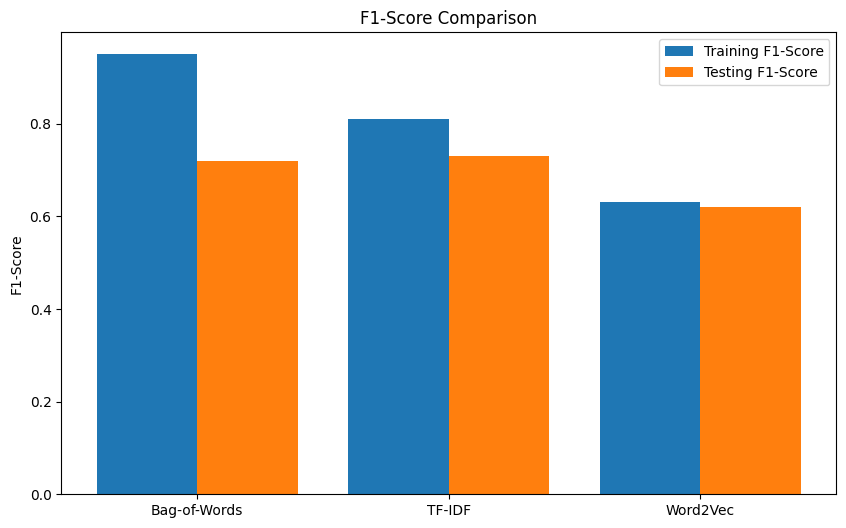

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics
techniques = ["Bag-of-Words", "TF-IDF", "Word2Vec"]
training_accuracy = [0.96, 0.83, 0.72]
testing_accuracy = [0.73, 0.76, 0.71]
training_f1 = [0.95, 0.81, 0.63]
testing_f1 = [0.72, 0.73, 0.62]

# Plot Accuracy
plt.figure(figsize=(10, 6))
x = np.arange(len(techniques))
plt.bar(x - 0.2, training_accuracy, width=0.4, label='Training Accuracy')
plt.bar(x + 0.2, testing_accuracy, width=0.4, label='Testing Accuracy')
plt.xticks(x, techniques)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend()
plt.show()

# Plot F1-Score
plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, training_f1, width=0.4, label='Training F1-Score')
plt.bar(x + 0.2, testing_f1, width=0.4, label='Testing F1-Score')
plt.xticks(x, techniques)
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison')
plt.legend()
plt.show()


1. #### **Accuracy Comparison Graph:**
    - ##### What It Represents:
        - ##### It shows the comparison of training and testing accuracy for each feature representation.
        - ##### Accuracy is the percentage of correct forecasts.
    - ##### Why It’s Useful:
        - ##### Overfitting Detection: A huge gap between the two datasets (e.g., Bag-of-Words) shows overfitting, meaning that the model did well in its training but it didn't generalize well to new data—distorting the results.
        - ##### Generalization: Identifies the feature representation making the best prediction on new data (e.g., TF-IDF).
    - ##### Relevance to the Project:
        - ##### Accuracy is one of the main criterions for sentiment classification effectiveness.
        - ##### The graph holds that TF-IDF is more general than Bag-of-Words that overfits.

2. #### **F1-Score Comparison Graph**
    - ##### What It Represents:
        ##### The chart allows us to see the comparison of the F1-Score function that has been used in models. F1-Score, the harmonic mean of precision and recall, is especially useful in shaping the rankings of the minority classes.
    - ##### Why It’s Useful:
        - ##### Class Performance: On the contrary, to accuracy metric that is a direct measurement, F1-Score allows for prediction of the model's success in handling minority classes.
        - ##### Balance Precision and Recall: Is the state of the entity being correctly labelled and the entity being falsely labeled in the data-sample at which the Running Bsucceed.
    - ##### Relevance to the Project:
        - ##### When class imbalance is experienced with sentiment lists, it is mostly positive reviews that run the show.
        - ##### F1-Score is in whose favor makes the class cleared from the class imbalance problem.
        - ##### TF-IDF attainment of the highest testing data of class F1-Score is, in essence, its better-generalized and balanced class result.

#### Why These Graphs Were Used
- ##### Holistic View of Model PerformanceMeta-evaluation of models as a result of a combination of metrics containing the accuracy and F1-Score.Example:Bag-of-Words: High accuracy but low F1-Score on testing indicates overfitting.TF-IDF: Balanced performance on all metrics, which is an indicator of increased generalization.

- ##### Highlight Differences Between TechniquesComparative representation uncovers the best performing of all the feature representations.Proposes simplification (Bag-of-Words), better generalization (TF-IDF), and semantic richness (Word2Vec).

- ##### Support Decision-MakingGraph-based observation.Data visualization preferentially supports TF-IDF's balance between training and testing errors.




#### **2. Compare different feature representation**


|**Metric**|	**Bag-of-Words**|	**TF-IDF**|	**Word2Vec**|
|---|---|---|---|
|Training Accuracy|	96%	|83%	|72%|
|Testing Accuracy|	73%	|76%	|71%|
|Training F1|	95%	|81%	|63%|
|Testing F1|	72%	|73%	|62%|

<Figure size 800x600 with 0 Axes>

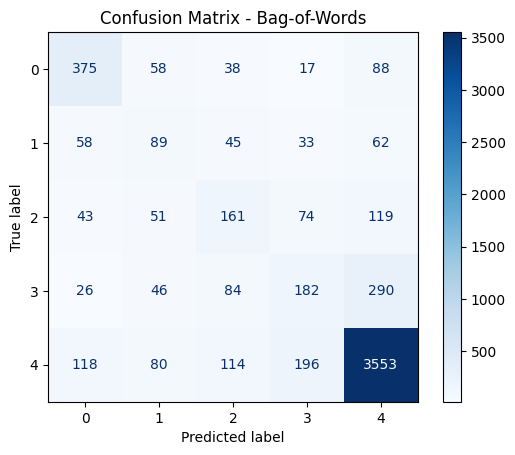

<Figure size 800x600 with 0 Axes>

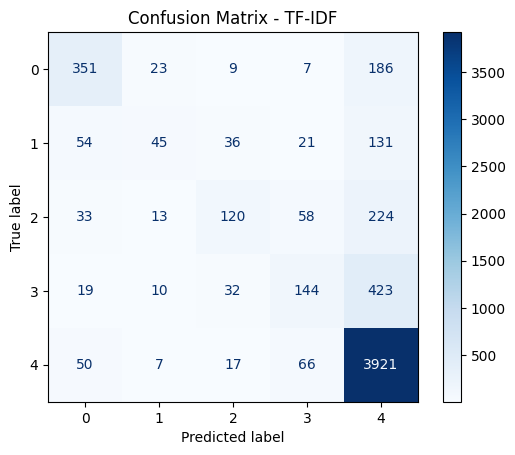

<Figure size 800x600 with 0 Axes>

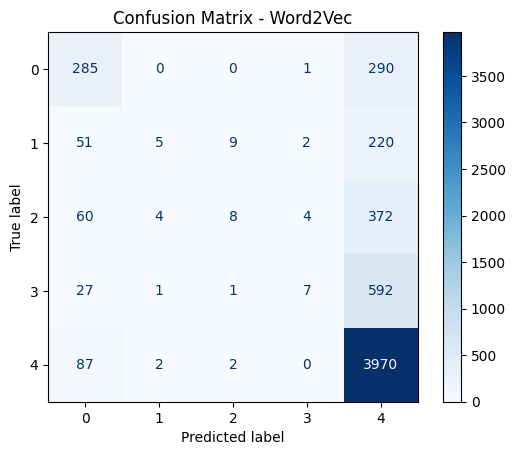

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix for Bag-of-Words
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_bow, cmap='Blues')
plt.title("Confusion Matrix - Bag-of-Words")
plt.show()

# Confusion Matrix for TF-IDF
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_tfidf, cmap='Blues')
plt.title("Confusion Matrix - TF-IDF")
plt.show()

# Confusion Matrix for Word2Vec
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_word2vec, cmap='Blues')
plt.title("Confusion Matrix - Word2Vec")
plt.show()

#### **Bag-of-Words:**

- ##### High training performance, which could be indicative of overfitting.
- ##### Performing well on the test data.
- ##### Struggles with rare classes in testing, such as classes 1–3.

#### **TF-IDF:**

- ##### Seems to find a balance between training and testing performance.
- ##### Mild overfitting compared to the Bag-of-Words.
- ##### Outperforms Bag-of-Words in testing F1-score, especially for minority classes.

#### **Word2Vec:**

- ##### Struggles on both training and testing.
- ##### The fixed embedding size of 300 may limit performance.
- ##### Most likely, more advanced architectures are needed, such as deep neural networks, to use it effectively.

### **3. Conclusion:**
##### The experiment involved the application of three different feature extraction techniques in a sentiment classification task, namely Bag-of-Words, TF-IDF, and Word2Vec.

1. #### **Bag-of-Words:**
    - #### Performance:
        - ##### High Training Accuracy: 96%
        - ##### Moderate Testing Accuracy: 73% - a fairly big gap from the training accuracies
        - #### Moderate Testing F1 Score: 72% or Poor Performances on the minority classes, such as classes 1 through 3.

    - ##### Strengths:
        - ##### Inexpensive to compute and quick
        - ##### A decent technique for capturing frequency features across words in simple data

    - #### Weaknesses:
        - ##### Poor generalization on unseen data, hence overfitting.
        - ##### It doesn't consider word order and semantic meaning.
        - ##### Larger feature dimensions, sparse vector representation, are computationally expensive for a large vocabulary.
    - #### Conclusion: 
        - #### BoW, while easy to implement and doing well on the training set, has moderate performance on the test set. Hence, it is less suitable for this task compared to more sophisticated techniques due to overfitting issues.

2. #### **TF-IDF:**
    - #### Performance:
        - ##### Training Accuracy: Good (83%), which shows it does not overfit.
        - ##### Testing Accuracy: Slightly better than Bag-of-Words (76%).
        - ##### Testing F1-Score: Same as Bag-of-Words (73%) but better at handling minority classes.
    - #### Strengths:
        - ##### Regulates the presence of terms and their prominence over the entire text collection, for instance, lowering the "the" and "and" occurrences.
        - ##### Avoids overfitting which we find in Bag-of-Words due to its focus on important features.
        - ##### The sets of features are not too big when compared to BoW.
    - #### Weaknesses:
        - ##### Still treats the context of words differently from one another.
        - ##### More cumbersome than Bag-of-Words to compute.
    - #### Conclusion: 
        - ##### It is the balanced performance of TF-IDF. It beats BoW in testing performance and avoids overfitting, which makes it a great choice for this particular task.

3. ####  **Word2Vec:**
    - #### Performance:
        - ##### Training Accuracy: Decidedly low (72%), indicating that there were difficulties in capturing patterns in the data.
        - ##### Testing Accuracy: The worst among all methods (71%).
        - ##### Testing F1-Score: The weakest (62%), which is due to a bad classification of minority classes.
    - #### Strengths:
        - ##### Can parse the semantic closeness of words by merging similar embeddings.
        - ##### Standard length of word embeddings (e.g., 300) makes it more computationally effective than the sparser Bag of Words/TF-IDF.
    - #### Weaknesses:
        - ##### It needs very good pre-trained embeddings or training on the task for better results.
        - ##### The division by the frequency of a word and multiplication by the vector average word loses the most contextual connections and the overlaps.
        - ##### It performs inefficiently with simple aggregation techniques like SVM in traditional machine learning models.
    - #### Conclusion: 
        - ##### Word2Vec is not the most appropriate solution for the current task. Although its ability to capture the semantic relationship is better when used in deep learning models or when fine-tuned with domain-specific data.

4. #### **Overall Conclusion:**
##### From the experiments, TF-IDF stands out as the most suited feature-type technique for this task.
- ##### It is clear and lets one catch the idea of the sentence by weighting word importance in a balanced way.
- ##### It works better than Bag-of-words to the whole data which is the general case (testing performance).
- ##### It works in such a way that it does not overfit, which is due to the fact of having it as a reliable option among other traditional machine learning models like SVM or Naive Bayes

5. #### **Recommendations for Improvement:**
    - ##### Domain-Specific Word2Vec or GloVe:Embed Word2Vec on the dataset to catch domain-specific semantics better.
    - ##### Train or fine-tune Word2Vec embeddings on the dataset to capture domain-specific semantic relationships better.
    - ##### Deep Learning Models for Word Embeddings:Use word vectors like Word2Vec or BERT with deep platforms such as LSTMs, GRUs, or transformers for better results.
    - ##### Use embeddings like Word2Vec or BERT with deep learning models such as LSTMs, GRUs, or transformers for better performance.
    - ##### Ensemble Techniques:Join different embedding methods (e.g., TF-IDF and Word2Vec) to utilize their differences.
    - ##### Combine multiple embedding methods (e.g., TF-IDF and Word2Vec) to leverage their strengths.

----